In [1]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importación de librerías
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
# Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Cargar datos
digitos = datasets.load_digits()
print(digitos)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

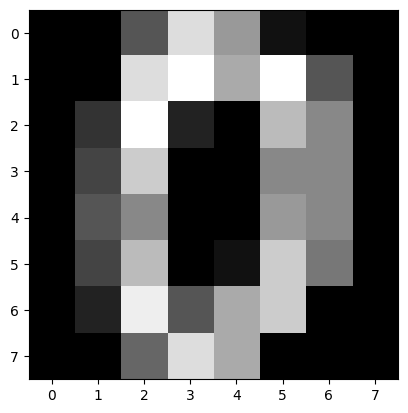

In [5]:
# Graficar una imagen de los dígitos -> 0
plt.imshow(digitos.images[0], cmap='gray')

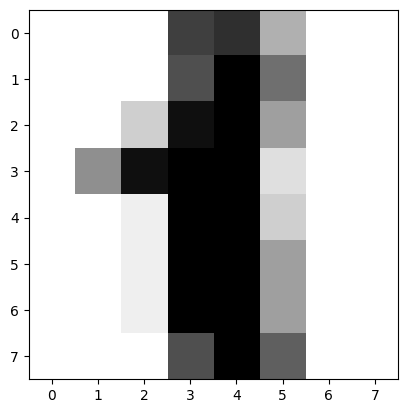

In [6]:
# Graficar 1 
plt.imshow(digitos.images[1], cmap=plt.cm.gray_r, interpolation='nearest')

In [9]:
# Forma de los datos
print('Data shape: ', digitos.data.shape)
print('Target shape: ', digitos.target.shape)

Data shape:  (1797, 64)
Target shape:  (1797,)


In [13]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digitos.data, digitos.target, test_size=0.2, random_state=42)

In [12]:
# Definición de la red neuronal
red_neuronal = MLPClassifier(random_state=1, max_iter=300)
# Aveces se necesitan mas o menos iteraciones para que converga, 
# lo ideal sería hacer un grid search para encontrar el mejor valor

In [14]:
# Entrenamiento
red_neuronal.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [17]:
# Predicción con la data de entrenamiento
y_train_pred = red_neuronal.predict(X_train)

In [24]:
# Puntaje
score_traing, score_test = red_neuronal.score(X_train, y_train), red_neuronal.score(X_test, y_test)
print('Score training: ', score_traing)
print('Score test: ', score_test)

Score training:  1.0
Score test:  0.9805555555555555


In [19]:
# Métricas
metrics.confusion_matrix(y_train, y_train_pred)

array([[145,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 154,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 144,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 149,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 135,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 146,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 145,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 144,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 140]])

In [20]:
# Reporte de clasificación
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [21]:
# Predicción con la data de prueba
y_test_pred = red_neuronal.predict(X_test)

In [23]:
# Matriz de confusión
metrics.confusion_matrix(y_test, y_test_pred)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

In [22]:
# Reporte de clasificación
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.98      1.00      0.99        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

